# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮

## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**


## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

# Imports

In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [26]:
# from google.colab import drive
# drive.mount('/content/drive')

# Dataset exploring

In [109]:
zones = pd.read_csv(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\Src_uber-non git\taxi-zone-lookup.csv")

dataset_01 = pd.read_csv(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\Src_uber-non git\uber-raw-data-apr14.csv")
dataset_02 = pd.read_csv(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\Src_uber-non git\uber-raw-data-aug14.csv")
dataset_03 = pd.read_csv(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\Src_uber-non git\uber-raw-data-jul14.csv")
dataset_04 = pd.read_csv(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\Src_uber-non git\uber-raw-data-may14.csv")
dataset_05 = pd.read_csv(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\Src_uber-non git\uber-raw-data-sep14.csv")

dataset = pd.concat([dataset_01,dataset_02,dataset_03,dataset_04,dataset_05]).reset_index().drop('index',axis=1)
dataset

Date/Time      Lat      Lon    Base
0          4/1/2014 0:11:00  40.7690 -73.9549  B02512
1          4/1/2014 0:17:00  40.7267 -74.0345  B02512
2          4/1/2014 0:21:00  40.7316 -73.9873  B02512
3          4/1/2014 0:28:00  40.7588 -73.9776  B02512
4          4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                     ...      ...      ...     ...
3870478  9/30/2014 22:57:00  40.7668 -73.9845  B02764
3870479  9/30/2014 22:57:00  40.6911 -74.1773  B02764
3870480  9/30/2014 22:58:00  40.8519 -73.9319  B02764
3870481  9/30/2014 22:58:00  40.7081 -74.0066  B02764
3870482  9/30/2014 22:58:00  40.7140 -73.9496  B02764

[3870483 rows x 4 columns]

In [ ]:
print("general info : ")
display(zones.info())
print()

print("Basics statistics: ")
data_zones_desc = zones.describe(include='all')
display(data_zones_desc)
print()

general info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LocationID  265 non-null    int64 
 1   Borough     265 non-null    object
 2   Zone        265 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.3+ KB


None


Basics statistics: 


LocationID Borough                                           Zone
count   265.000000     265                                            265
unique         NaN       7                                            261
top            NaN  Queens  Governor's Island/Ellis Island/Liberty Island
freq           NaN      69                                              3
mean    133.000000     NaN                                            NaN
std      76.643112     NaN                                            NaN
min       1.000000     NaN                                            NaN
25%      67.000000     NaN                                            NaN
50%     133.000000     NaN                                            NaN
75%     199.000000     NaN                                            NaN
max     265.000000     NaN                                            NaN

In [ ]:
print("general info : ")
display(dataset.info())
print()

print("Basics statistics: ")
data_uber_desc = dataset.describe(include='all')
display(data_uber_desc)
print()

general info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870483 entries, 0 to 3870482
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 118.1+ MB


None


Basics statistics: 


Date/Time           Lat           Lon     Base
count             3870483  3.870483e+06  3.870483e+06  3870483
unique             217524           NaN           NaN        5
top     4/7/2014 20:21:00           NaN           NaN   B02617
freq                   97           NaN           NaN  1274393
mean                  NaN  4.073915e+01 -7.397284e+01      NaN
std                   NaN  4.021090e-02  5.737043e-02      NaN
min                   NaN  3.965690e+01 -7.492900e+01      NaN
25%                   NaN  4.072090e+01 -7.399650e+01      NaN
50%                   NaN  4.074200e+01 -7.398340e+01      NaN
75%                   NaN  4.076090e+01 -7.396480e+01      NaN
max                   NaN  4.211660e+01 -7.206660e+01      NaN

#### Process datetime and pick one hour sample

In [111]:
dataset["Date/Time"] = pd.to_datetime(dataset["Date/Time"])
dataset['Week_day'] = pd.to_datetime(dataset['Date/Time']).dt.dayofweek
dataset['Hour'] = pd.to_datetime(dataset_04['Date/Time']).dt.hour

# dataset_04['Year'] = pd.to_datetime(dataset_04['Date/Time']).dt.year
# dataset_04['Month'] = pd.to_datetime(dataset_04['Date/Time']).dt.month
# dataset_04['Day'] = pd.to_datetime(dataset_04['Date/Time']).dt.day


## K-Means test

##### Preprocessing. We will keep only standard scaled values of lat & lon since we are working on a sample of time.
##### We assume that "Base" does not provide meaningful information for the moment.

In [30]:
dataset_test = dataset[["Lat", "Lon"]].sample(n=100_000)
dataset_test

Lat      Lon
3043064  40.8034 -74.1137
3165163  40.7212 -73.8552
1467916  40.7566 -73.9744
3614758  40.7221 -74.0043
2921162  40.8557 -73.9340
...          ...      ...
2991603  40.6465 -73.7894
256460   40.7422 -73.9828
2277490  40.7625 -73.9963
3736584  40.7537 -73.9696
2002691  40.7647 -73.9699

[100000 rows x 2 columns]

In [31]:
scaler = StandardScaler()
sc_dataset_sample_kmeans = scaler.fit_transform(dataset_test)

In [ ]:
# Testing elbow method do find best cluster number
wcss =  []
k = []

for i in range (2,12):
    kmeans = KMeans(n_clusters= i, random_state = 0, n_init = 100)
    kmeans.fit(sc_dataset_sample_kmeans)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=2 --> 141412.08954025107
WCSS for K=3 --> 97536.93979893491
WCSS for K=4 --> 79798.83045097711
WCSS for K=5 --> 66667.44693175206
WCSS for K=6 --> 54055.48704320818
WCSS for K=7 --> 45821.562719780406
WCSS for K=8 --> 39461.43730700207
WCSS for K=9 --> 34595.00086110966
WCSS for K=10 --> 31094.609180407868
WCSS for K=11 --> 27640.995549100437


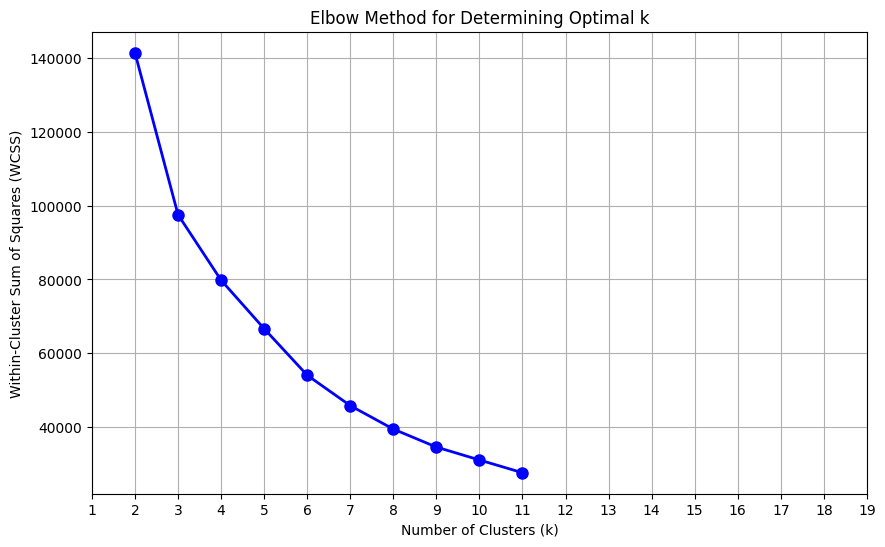

In [ ]:
# Visualising results
plt.figure(figsize=(10, 6))
plt.plot(k, wcss, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal k')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [32]:
# Train kmeans
kmeans_test_1 = KMeans(n_clusters=7, random_state=0)
kmeans_test_1.fit(sc_dataset_sample_kmeans)

dataset_test["cluster_kmeans"] = kmeans_test_1.labels_

In [34]:
#visualising results

fig_1 = px.scatter_mapbox(dataset_test,
                        lat='Lat',
                        lon='Lon',
                        color='cluster_kmeans',
                        mapbox_style="open-street-map",
                        title='K-Means Clustering of Rides',
                        height=600)

fig_1.update_layout(
    mapbox=dict(
        center=dict(lat=dataset_test['Lat'].mean(), lon=dataset_test['Lon'].mean())
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig_1.show()
# fig_1.write_image(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\ML_Engineer_Certification_Projects\05_UNSUPERVISED _ML_Uber\Maps_vis_Uber_deliverable_01/Kmeans_test_cluster_map.png")

print(f"datapoints per {dataset_test["cluster_kmeans"].value_counts()}")

datapoints per cluster_kmeans
3    39772
0    38482
2    12138
6     3950
4     2917
5     1503
1     1238
Name: count, dtype: int64


## DBScan test

##### We will try to define best params for DBScan, even if it doesn't seem to be very usefull given the goal of the exercice and the results of KMeans.
##### This time we will try using haversine distance for the algorithm.

In [ ]:
dataset_test_2 = dataset_test[["Lat","Lon"]]
dataset_test_2.head()

Lat      Lon
1961330  40.7463 -73.9978
338275   40.7165 -73.9586
3095562  40.7628 -73.9948
1841240  40.7349 -74.0078
1916084  40.7418 -74.0038

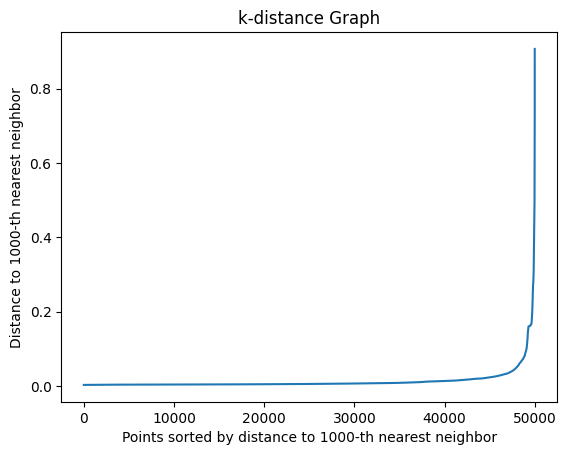

In [ ]:
# Determining optimal EPS

k = 1000  # Set k to test value of min_samples
nbrs = NearestNeighbors(n_neighbors=k, metric='haversine').fit(dataset_test_2)
distances, indices = nbrs.kneighbors(dataset_test_2)

# Sort the distances to the k-th nearest neighbor
k_distances = distances[:, k-1]
k_distances.sort()

# Plotting
plt.plot(k_distances)
plt.xlabel('Points sorted by distance to {}-th nearest neighbor'.format(k))
plt.ylabel('Distance to {}-th nearest neighbor'.format(k))
plt.title('k-distance Graph')
plt.show()

In [ ]:
# Determining optimal min_sample

epsilon = 0.15  # Set eps to test value of Epsilon
min_samples_range = range(200, 2000, 500)  # Example range for min_samples
best_score = -1
best_min_samples = 0

for min_samples in min_samples_range:
    db = DBSCAN(eps=epsilon, min_samples=min_samples, metric='haversine').fit(dataset_test_2)
    labels = db.labels_
    # Only calculate silhouette score if there are more than 1 cluster
    if len(set(labels)) > 1:
        score = silhouette_score(dataset_test_2, labels, metric='haversine')
        if score > best_score:
            best_score = score
            best_min_samples = min_samples

print('Best silhouette score:', best_score)
print('Optimal min_samples:', best_min_samples)

# CRASHED MEMORY

In [ ]:
db_test_1 = DBSCAN(eps=0.15, min_samples=2, metric="haversine", algorithm="brute")
db_test_1.fit(dataset_test_2)

dataset_test_2["cluster_dbscan"] = db_test_1.labels_

# CRASHED MEMORY

In [ ]:
#visualising results

fig_2 = px.scatter_mapbox(dataset_test,
                        lat='Lat',
                        lon='Lon',
                        color='cluster_kmeans',
                        mapbox_style="open-street-map",
                        title='K-Means Clustering of Rides',
                        height=800)

fig_2.update_layout(
    mapbox=dict(
        center=dict(lat=dataset_test_2['Lat'].mean(), lon=dataset_test_2['Lon'].mean())
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig_2.show()

# Focus on KMeans algorithm. We will calculate distance from centroids by car.

In [44]:
#Train Kmeans full dataset

dataset_1 = dataset[["Lat","Lon"]]
scaler = StandardScaler()
sc_dataset = scaler.fit_transform(dataset_1)
kmeans_1 = KMeans(n_clusters=7, random_state=0)
kmeans_1.fit(sc_dataset)
cluster_centers = scaler.inverse_transform(kmeans_1.cluster_centers_)
cluster_centers

array([[ 40.76414904, -73.975202  ],
       [ 40.65959993, -73.77870984],
       [ 40.67759427, -73.96621322],
       [ 40.7932872 , -73.89387739],
       [ 40.93338532, -73.65353631],
       [ 40.69644361, -74.20360726],
       [ 40.7286258 , -73.9947584 ]])

##### Calculate Manhattant distance from the cluster center to the datapoint, to see if it is reacheable.
##### Not using haversine because we are in a road distance problematic, and assume the average speed of a taxi is 35 km/h (50 max, minus traffic stops)

In [36]:
import math
def manhattan_distance(lat1, lon1, lat2, lon2):

  # Earth's radius
  earth_radius = 6371

  # Convert degrees to radians
  lat1_rad = math.radians(lat1)
  lon1_rad = math.radians(lon1)
  lat2_rad = math.radians(lat2)
  lon2_rad = math.radians(lon2)

  # Absolute difference in radians (considering Earth's curvature)
  distance_x = abs(lon2_rad - lon1_rad) * earth_radius * math.cos( (lat1_rad + lat2_rad) / 2 )
  distance_y = abs(lat2_rad - lat1_rad) * earth_radius

  # Manhattan distance (in kilometers)
  manhattan_distance = distance_x + distance_y

  return manhattan_distance

In [68]:
# (7/60) * 35 = 4,08km for a cab to reach a passenger in less than 7min.
dataset["cluster_kmeans_2"] = kmeans_2.labels_

cluster_centers_df_2 = pd.DataFrame(cluster_centers_2).reset_index()
cluster_centers_df_2.columns = ['cluster_kmeans_2','cluster_Lat','cluster_Lon']

dataset_test_distance_2 = dataset.merge(cluster_centers_df_2, how='left', on='cluster_kmeans_2')
dataset_test_distance_2["distance"] = np.vectorize(manhattan_distance)(
    dataset_test_distance_2["Lat"].to_numpy(),
    dataset_test_distance_2["Lon"].to_numpy(),
    dataset_test_distance_2["cluster_Lat"].to_numpy(),
    dataset_test_distance_2["cluster_Lon"].to_numpy())

dataset_test_distance_2["reach"] = dataset_test_distance_2["distance"] < 4.08
display(dataset_test_distance_2.head())

print(f"Reacheable rides in % {dataset_test_distance_2["reach"].value_counts(normalize=True)*100}")

Date/Time      Lat      Lon    Base  Week_day  Hour  \
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512         1   0.0   
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512         1   0.0   
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512         1   0.0   
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512         1   0.0   
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512         1   0.0   

   cluster_kmeans  cluster_kmeans_2  cluster_Lat  cluster_Lon  distance  reach  
0               0                 2    40.777365   -73.958904  1.267351   True  
1               6                 1    40.718200   -74.001727  3.707036   True  
2               6                 7    40.737261   -73.997049  1.450968   True  
3               0                17    40.763863   -73.979248  0.701802   True  
4               0                17    40.763863   -73.979248  1.089887   True

Reacheable rides in % reach
True     95.416309
False     4.583691
Name: proportion, dtype: float64


## The performance of the algorithm seams improvable. Test with more clusters, saving maps

In [71]:
# Hist of Kmeans clustering performance
Reacheable_rides = {
                    "7 clusters" : (dataset_test_distance["reach"] == True).mean() * 100,
                    "15 clusters" :(dataset_test_distance_1["reach"] == True).mean() * 100,
                    "20 clusters" :(dataset_test_distance_2["reach"] == True).mean() * 100,
                    }

Reacheable_rides

{'7 clusters': 84.74570228056808,
 '15 clusters': 94.96465944947956,
 '20 clusters': 95.41630850723281}

In [72]:
# Visualizing results
fig_3 = px.scatter_mapbox(dataset_test_distance_2.sample(n=150_000),
                        lat='Lat',
                        lon='Lon',
                        color='reach',
                        mapbox_style="open-street-map",
                        title='Reachable rides',
                        height=600)

fig_3.update_layout(
    mapbox=dict(center=dict(lat=dataset_test_distance_2['cluster_Lat'].mean(),
                            lon=dataset_test_distance_2['cluster_Lon'].mean())),
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig_3.write_image(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\ML_Engineer_Certification_Projects\05_UNSUPERVISED _ML_Uber\Maps_vis_Uber_deliverable_01/Kmeans_20clusters_reachable_map.png")
fig_3.show()

## We will retain KMeans with 15 clusters (95% efficiency). Let's try to plot per day of week.

In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870483 entries, 0 to 3870482
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Week_day   int32         
 5   Hour       float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 162.4+ MB


In [114]:
dataset_final = pd.DataFrame()
km = KMeans(n_clusters=15)
Reacheable_stats_per_day = []

# Iterate through each day of the week
for day in range(7):
    data_for_kmeans = dataset.loc[dataset['Week_day'] == day,:].drop(['Date/Time', 'Base', 'Week_day', 'Hour'], axis = 1)
    sc_data = scaler.fit_transform(data_for_kmeans)
    km.fit(sc_data)
    data_for_kmeans["cluster"] = km.labels_

    cluster_centers = scaler.inverse_transform(km.cluster_centers_)
    cluster_centers_df = pd.DataFrame(cluster_centers).reset_index()
    cluster_centers_df.columns = ['cluster','cluster_Lat','cluster_Lon']

    dataset_distance = data_for_kmeans.reset_index().merge(cluster_centers_df, how='left', on='cluster')
    dataset_distance["distance"] = np.vectorize(manhattan_distance)(
        dataset_distance["Lat"].to_numpy(),
        dataset_distance["Lon"].to_numpy(),
        dataset_distance["cluster_Lat"].to_numpy(),
        dataset_distance["cluster_Lon"].to_numpy())

    dataset_distance["reach"] = dataset_distance["distance"] < 4.08

    day_dataset = dataset.loc[dataset['Week_day'] == day,:].copy().reset_index()
    day_dataset = day_dataset.merge(dataset_distance ,how='left', on="index")
    dataset_final = pd.concat([dataset_final,day_dataset])
    
    reacheable_score = (dataset_distance["reach"] == True).mean() * 100
    Reacheable_stats_per_day.append((day,reacheable_score))

In [123]:
fig_5 = px.scatter_mapbox(dataset_final.sample(n=100_000),
                  lon='Lon_x',
                  lat='Lat_x',
                  color='reach',
                  mapbox_style='open-street-map',
                  animation_group='Week_day',
                  animation_frame='Week_day',
                  title="Reachable uber requests under 7min from clusters centers",
                  height=600)
fig_5.update_layout(
    margin=dict(l=0, r=0, t=40, b=0),
)

fig_5.write_html(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\CERTIF_PROJECTS\ML_Engineer_Certification_Projects\05_UNSUPERVISED _ML_Uber\Maps_vis_Uber_deliverable_01/Kmeans_15clusters_Weekday_animation_map.html")

fig_5.show()

In [1]:
# Limits : 

# Distance made by a car can be very different depending on day, hour of the week and even month of the year (traffic jam).
